# Similarity-Metrics for 2b vs 4b

**Goal:** So we were looking at some of the distributions for 2b vs 4b, and some of them looked kind of quantitatively different, so we wanted to quantify this by looking at some metrics which characterize the differences in distributions.

## Metrics of interest

### KL divergence

$$D_{KL}(P || Q) = - \sum_{x \in \mathcal{X}} P(x) \log \left( \frac{Q(x)}{P(x)} \right)$$

"The expectation of the logarithmic difference between the probabilities $P$ and $Q$, where the expectation is taken using the probabilities $P$."

### Jensen-Shannon divergence

This is just a symmetrized and smoothed version of the KL divergence

$$D_{JS}(P||Q) = \frac{1}{2} D_{KL}(P||M) + \frac{1}{2}D_{KL}(Q||M)$$
 
where $M = \frac{1}{2} (P+Q)$.

## Distributrions to compare 

So, there are a lot of distributions that I *could* compare, but I think I'm going to want to focus on just a few for starters:

**After the four good jets selection**
- $\Delta R_{jj}$ for the leading and subleading HCs for all possible pairings
- $m_{4j}$
- $m_{HC1}$ and $m_{HC2}$

**After the pairing alg**
- $m_{4j}$
- $m_{HC1}$ and $m_{HC2}$

I'll also be putting the trigger first, par usual.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import uproot

import os
import sys
sys.path.append("../code")
from preprocess import read_tsv, fileDir
from plotting import varEvolution, massPlane, normHist2d

from scipy.stats import entropy, pearsonr, skew

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
run_one = False

In [3]:
fDir = "../data/data_15_PFlow/"
subDir = 'data_15'
title = "data 2015"

if run_one:
    fName = "files/df_periodJ_f_0.22_000001.h5" # for lower stats
else:
    fName = "files/df_period?_f_0.22_00*.h5"

In [4]:
myFiles = fDir + fName

dfs_2b = []
dfs_4b = []
    
cols = ['pair0_HC1_m', 'pair0_HC1_dRjj', 'pair0_HC2_m', 'pair0_HC2_dRjj', 
        'pair0_Dhh', 'pair0_mask', 
        'pair1_HC1_m', 'pair1_HC1_dRjj', 'pair1_HC2_m', 'pair1_HC2_dRjj', 
        'pair1_Dhh', 'pair1_mask', 
        'pair2_HC1_m', 'pair2_HC1_dRjj', 'pair2_HC2_m', 'pair2_HC2_dRjj', 
        'pair2_Dhh', 'pair2_mask', 
        'nbtags', 'trigger', 'nValidPairs', 'HC1_vecSum_pT', 'HC2_vecSum_pT', 
        'deta_hh', 'Xhh', 'Xwt', 'm4j',
        'njets', 'HC1_m', 'HC1_pT', 'HC2_m', 'HC2_pT',
        'fourGoodJets', 'MDR', 'MDpT', 'cut_deta_hh', 'cut_Xwt', 'cut_Xhh']
    
for i, myFile in enumerate(glob.glob(myFiles)):

    print('{}. {}'.format(i+1,myFile))
    
    df = pd.read_hdf(myFile,key='df')
    
    dfs_2b.append(df.loc[df.fourGoodJets & df.trigger & (df.nbtags == 2), cols])
    dfs_4b.append(df.loc[df.fourGoodJets & df.trigger & (df.nbtags >= 4), cols])
    
df_2b = pd.concat(dfs_2b)
df_4b = pd.concat(dfs_4b)

1. ../data/data_15_PFlow/files/df_periodJ_f_0.22_000009.h5
2. ../data/data_15_PFlow/files/df_periodF_f_0.22_000001.h5
3. ../data/data_15_PFlow/files/df_periodE_f_0.22_000012.h5
4. ../data/data_15_PFlow/files/df_periodJ_f_0.22_000023.h5
5. ../data/data_15_PFlow/files/df_periodJ_f_0.22_000022.h5
6. ../data/data_15_PFlow/files/df_periodG_f_0.22_000015.h5
7. ../data/data_15_PFlow/files/df_periodD_f_0.22_000021.h5
8. ../data/data_15_PFlow/files/df_periodG_f_0.22_000006.h5
9. ../data/data_15_PFlow/files/df_periodG_f_0.22_000009.h5
10. ../data/data_15_PFlow/files/df_periodE_f_0.22_000011.h5
11. ../data/data_15_PFlow/files/df_periodE_f_0.22_000003.h5
12. ../data/data_15_PFlow/files/df_periodJ_f_0.22_000001.h5
13. ../data/data_15_PFlow/files/df_periodD_f_0.22_000016.h5
14. ../data/data_15_PFlow/files/df_periodD_f_0.22_000011.h5
15. ../data/data_15_PFlow/files/df_periodH_f_0.22_000005.h5
16. ../data/data_15_PFlow/files/df_periodE_f_0.22_000016.h5
17. ../data/data_15_PFlow/files/df_periodE_f_0.22

### Analysis snapshot just after the four good jet selection

In [5]:
figDir = "../figures/data_15/similarityMetrics"

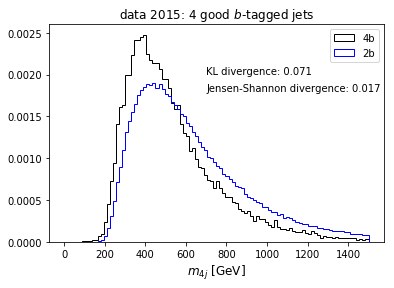

In [6]:
# m4j
nBins=100
myRange=(0,1500)

p, edg, _ = plt.hist([df_2b['m4j'],df_4b['m4j']],
                     bins=nBins,range=myRange, density=True, 
                     color=['b','k'],histtype='step', label=['2b','4b'])

KL = entropy(p[1],p[0])

m = 0.5 * (p[1] + p[0])
JS = 0.5 * (entropy(p[1],m) + entropy(p[0],m))

plt.text(700,.002,'KL divergence: {:.3f}'.format(KL))
plt.text(700,.0018,'Jensen-Shannon divergence: {:.3f}'.format(JS))


plt.legend()
plt.title(title + ": 4 good $b$-tagged jets")
plt.xlabel('$m_{4j}$ [GeV]',fontsize=12)
plt.savefig("{}/fourGoodJets_m4j.pdf".format(figDir))
plt.show()

**Note:** The normalization by matplotlib's histogram function doesn't normalize all the sum of the bins to 1, it normalizes the *area* to one. However, this doesn't matter for this application because the `entropy` function will normalize the distributions if they are not already normalized 

In [7]:
np.sum(p[0]) * (myRange[1] - myRange[0]) / nBins

1.0

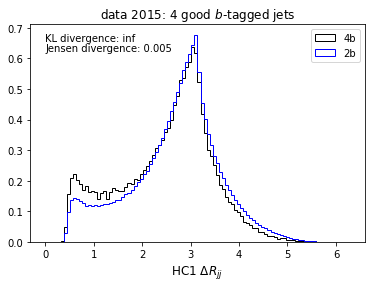

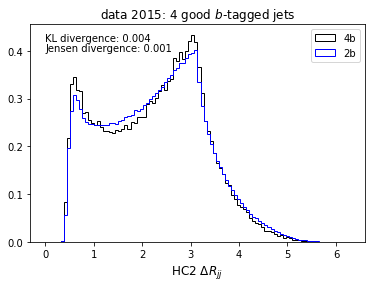

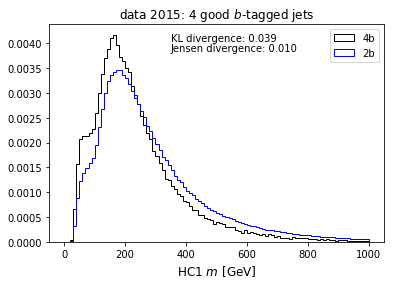

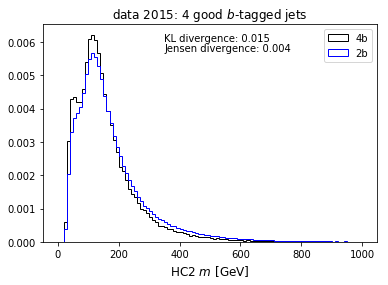

In [8]:
for v, myRange, xlabel in zip(['dRjj','m'],[(0,2*np.pi),(0,1000)],['$\Delta R_{jj}$','$m$ [GeV]']):
    
    for hc in ['HC1','HC2']:
    
        key = "{}_{}".format(hc,v)
        v2b = np.concatenate([df_2b['pair{}_{}'.format(i,key)] for i in range(3)],axis=0)
        v4b = np.concatenate([df_4b['pair{}_{}'.format(i,key)] for i in range(3)],axis=0)

        # Draw the histogram
        p, edg, _ = plt.hist([v2b,v4b], bins=nBins,range=myRange, density=True, 
                             color=['b','k'],histtype='step', label=['2b','4b'])

        KL = entropy(p[1],p[0])

        m = 0.5 * (p[1] + p[0])
        JS = 0.5 * (entropy(p[1],m) + entropy(p[0],m))

        _,ymax = plt.ylim()
        xmin = 0 if v == 'dRjj' else myRange[1]*0.35
        
        plt.text(xmin,0.925*ymax,'KL divergence: {:.3f}'.format(KL))
        plt.text(xmin,0.875*ymax,'Jensen divergence: {:.3f}'.format(JS))

        plt.legend()
        plt.title(title + ": 4 good $b$-tagged jets")
        plt.xlabel(hc + " "+ xlabel, fontsize=12)
        plt.savefig("{}/fourGoodJets_{}.pdf".format(figDir,key))
        plt.show()


**Conclusions:** I think for future studies, I should probably use the Jensen-Shannon divergence for the metric, since 
1. It's unclear to me whether I want to evaluate the discrepancy between the distributions w/r.t. the 4b or the 2b distributions
2. I really like the feature that it can cope with entries that have 0 bins!


But also, since I'm computing the distance metric this way, the Jensen Shannon divergence is *smaller*, so maybe it's washing out some of this information.

### Analysis snapshot just after the pairing

Now I need to include the `MDR` mask

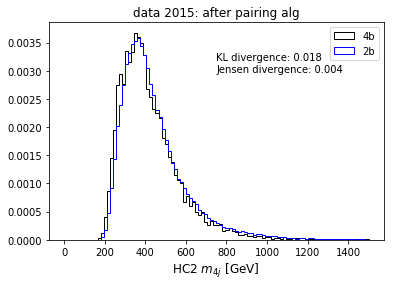

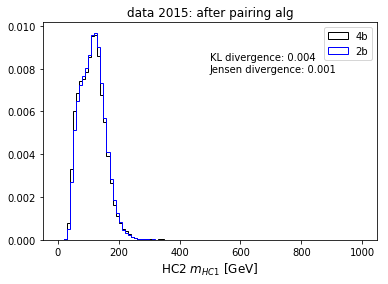

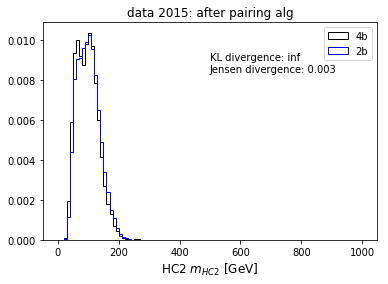

In [9]:
for v, myRange, xlabel in zip(['m4j','HC1_m','HC2_m'],[(0,1500)]+[(0,1000)]*2,
                              ['$m_{4j}$ [GeV]','$m_{HC1}$ [GeV]','$m_{HC2}$ [GeV]']):
    
    # Draw the histogram
    p, edg, _ = plt.hist([df_2b.loc[df_2b.MDR,v],df_4b.loc[df_4b.MDR,v]], 
                         bins=nBins,range=myRange, density=True, 
                         color=['b','k'],histtype='step', label=['2b','4b'])

    KL = entropy(p[1],p[0])

    m = 0.5 * (p[1] + p[0])
    JS = 0.5 * (entropy(p[1],m) + entropy(p[0],m))

    _,ymax = plt.ylim()

    plt.text(0.5*(myRange[0]+myRange[1]),0.825*ymax,'KL divergence: {:.3f}'.format(KL))
    plt.text(0.5*(myRange[0]+myRange[1]),0.77*ymax,'Jensen divergence: {:.3f}'.format(JS))

    plt.legend()
    plt.title(title + ": after pairing alg")
    plt.xlabel(hc + " "+ xlabel, fontsize=12)
    plt.savefig("{}/MDR_{}.pdf".format(figDir,v))
    plt.show()



Also, I thought it was interesting that this double peaked structure is much more pronounced for 4b than 2b, something we've kind of been seeing before - might be worthwhile to understand this feature!

**Possible follow-up:** I could also look at how different these distributions are for signal and background.

## Metrics for modelling the QCD background

One of the conclusions from my talk on Mar $27^{th}$ was that we could gain by modelling the QCD background separately for each of the number of pairings, so Michael said I could try playing arond a bit for the functiona"l forms for the background!

For this study, I think I'm going to try looking at the analysis just after the pairing step, and use 2b since the stats are better.

In [10]:
from matplotlib.colors import LogNorm

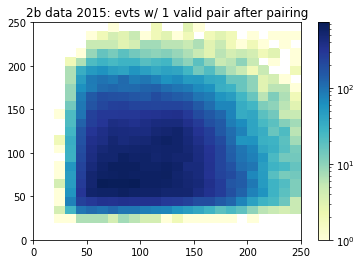

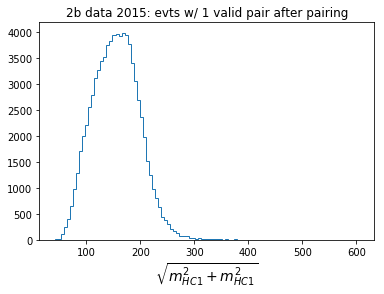

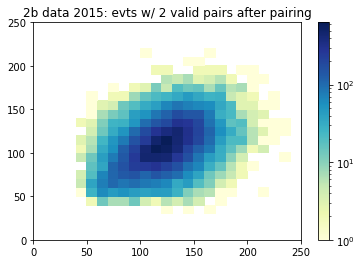

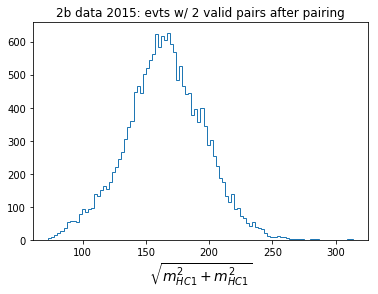

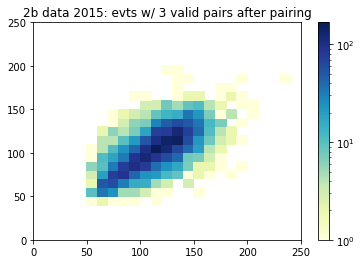

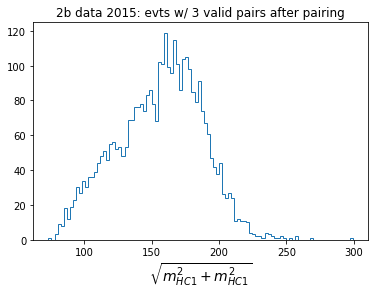

In [11]:
r = (0,250)

for nPairs in [1,2,3]:
    
    # Get the masses
    my_title = "2b " + title + ': evts w/ {} valid pair{}'.format(nPairs,'' if nPairs==1 else 's')
    my_title += ' after pairing'
    
    mask_pi = df_2b.MDR & (df_2b.nValidPairs == nPairs)
    
    plt.figure()
    plt.hist2d(df_2b.loc[mask_pi,'HC1_m'], df_2b.loc[mask_pi,'HC2_m'],
              bins=25, range=[r,r], cmap="YlGnBu",norm=LogNorm())
    
    plt.colorbar()
    plt.title(my_title)
    #plt.savefig()
    
    
    
    # Plot the density for the radius as a function of the pairing category
    plt.figure()
    R = np.sqrt(np.power(df_2b.loc[mask_pi,'HC1_m'],2) + np.power(df_2b.loc[mask_pi,'HC2_m'],2))
    plt.hist(R,100,histtype='step')
    plt.xlabel('$\sqrt{m_{HC1}^2 + m_{HC1}^2}$',fontsize=14)
    plt.title(my_title)
    #plt.savefig()
    
    plt.show()

Since the qualitative observation was that the background shape depends on the # of valid pairings, I'm going to break down my workflow based on this as well.

### One valid pairing

/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3_tf/lib/python3.6/site-packages/matplotlib/axes/_base.py:1330: MatplotlibDeprecationWarning: 
box-forced
  "2.2", "box-forced", obj_type="keyword argument")


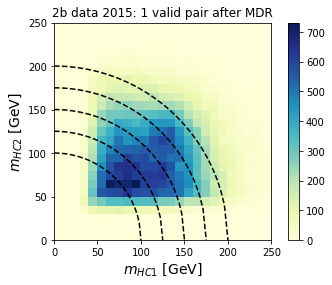

In [12]:
nPairs = 1
figDir = "../figures/2b_data_15/bkgModels"

# Get the masses
my_title = "2b " + title + ': 1 valid pair after MDR'
mask_pi = (df_2b.nValidPairs == nPairs)

plt.figure()
ax = plt.subplot(aspect='equal',adjustable='box-forced')

plt.hist2d(df_2b.loc[mask_pi,'HC1_m'], df_2b.loc[mask_pi,'HC2_m'],
          bins=25, range=[r,r], cmap="YlGnBu")

plt.colorbar()
plt.title(my_title)
plt.xlabel('$m_{HC1}$ [GeV]',fontsize=14)
plt.ylabel('$m_{HC2}$ [GeV]',fontsize=14)

# Add some semi-circles on this line too to demonstrate the effect we're trying to probe
for R in [100, 125, 150, 175, 200]:
    
    m1s = np.linspace(0,R)
    m2s = np.sqrt(R**2 - m1s**2)

    plt.plot(m1s,m2s,'k--')

plt.savefig('{}/MDR_massplane_{}validPair.pdf'.format(figDir,nPairs))
plt.show()

**Brainstorming functional forms**
- Maybe it follows a Landau distribution?
- Perhaps it's radially symmetric?
- Are $m_{HC1}$ and $m_{HC2}$ independent, or can we transform the variable to get two variables that are independent?

### Density in the $(R, \theta)$ plane


In [13]:
theta = np.arctan( df_2b.loc[mask_pi,'HC2_m'] / df_2b.loc[mask_pi,'HC1_m'] )
R = np.sqrt(np.power(df_2b.loc[mask_pi,'HC1_m'],2) + np.power(df_2b.loc[mask_pi,'HC2_m'],2))

To figure out where to set the bins on the axes, look at the 1d plots

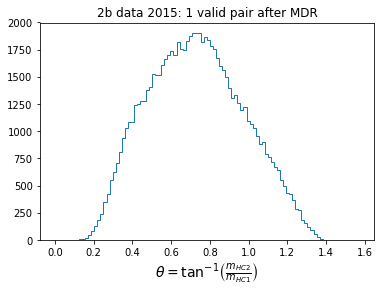

In [14]:
plt.hist(theta,bins=100,range=(0,np.pi/2),histtype='step')

xlabel = r'$\theta = \tan^{-1}  \left( \frac{m_{HC2}}{m_{HC1}} \right) $'
plt.xlabel(xlabel,fontsize=14)
plt.title(my_title)

plt.savefig('{}/MDR_theta_{}validPair.pdf'.format(figDir,nPairs))
plt.show()

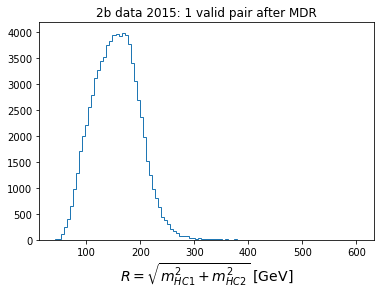

In [15]:
plt.hist(R,100,histtype='step')
ylabel = '$R = \sqrt{m_{HC1}^2 + m_{HC2}^2}$ [GeV]'
plt.xlabel(ylabel,fontsize=14)
plt.title(my_title)

plt.savefig('{}/MDR_R_{}validPair.pdf'.format(figDir,nPairs))
plt.show()

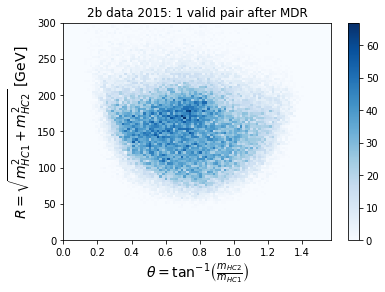

In [16]:
plt.hist2d(theta, R, bins=100, range=[(0,np.pi/2),(0,300)], cmap="Blues")

plt.xlabel(xlabel,fontsize=14)
plt.ylabel(ylabel,fontsize=14)
plt.title(my_title)
plt.colorbar()

plt.savefig('{}/MDR_R_vs_theta_{}validPair.pdf'.format(figDir,nPairs))
plt.show()

**Cool!** This looks kind of blobby now, maybe this means $\theta$ and $R$ are uncorrelated... how would I test this? Calculate the Pearson correlation coefficient!!

In [17]:
corrCoeff, p = pearsonr(theta,R)
print(corrCoeff,p)

-0.09412827374847675 9.860144490465656e-157


The correlation coefficient is actaully saying that these variables are slightly negatively correlated... interesting!

I think the next thing to do here is look at the distribution of $R$ in slices of $\theta$, so doing this thing that Michael was talking about... writing this function to get the (normalized) conditionals from a 2d distribution.  


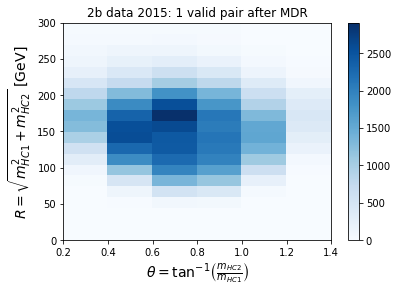

In [18]:
n, xedg, yedg, _ = plt.hist2d(theta, R, bins=[6,20], range=[(0.2,1.4),(0,300)], cmap="Blues")

plt.xlabel(xlabel,fontsize=14)
plt.ylabel(ylabel,fontsize=14)
plt.title(my_title)
plt.colorbar()

plt.savefig('{}/MDR_R_vs_theta_{}validPair_largerBins.pdf'.format(figDir,nPairs))
plt.show()

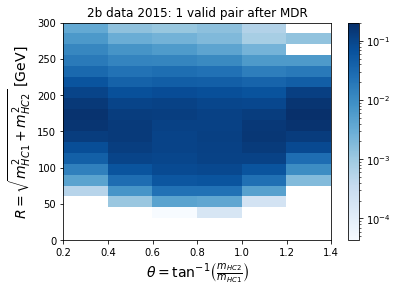

In [19]:
c = normHist2d(n,xedg,yedg,normCol=True,xlabel=xlabel,ylabel=ylabel,title=my_title,
               cmap='Blues',returnCounts=True,figDir=figDir,figName='MDR_R_vs_theta_1validPair')

This looks super cool! Let's make the conditional plot now :)

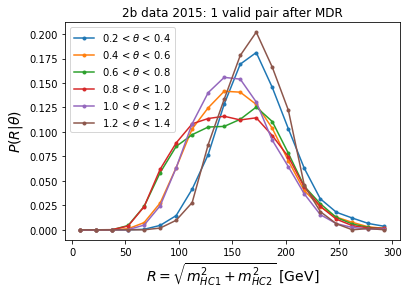

In [20]:
Rs = 0.5 * (yedg[:-1] + yedg[1:])

for i, thetaBin  in enumerate(zip(xedg[:-1],xedg[1:])):
    label = r"{} < $\theta$ < {}".format(*thetaBin)
    plt.plot(Rs,c[i], marker='.', label=label)
    
plt.xlabel(ylabel,fontsize=14)
plt.ylabel(r'$P(R | \theta)$',fontsize=14)
plt.title(my_title)
plt.legend()

plt.savefig('{}/MDR_R_given_theta_{}validPair.pdf'.format(figDir,nPairs),bbox_inches='tight')
plt.show()

**Lesson:** I think this is saying that the points closer to the diagonal in the $(m_{HC1},m_{HC2})$ plane tend to correspond to slightly smaller masses.

Could this be due to the fact that I have "non-Gaussian" tails (perhaps), so maybe a Landau distribution would be more instructive to look at?


### Correlation between $m_{HC1}$ and $m_{HC2}$

- Why is this interesting to look at? I think it's helpful to know whether the background HCs are correlated or not. I think to do this study, I'm going to want to look at both $P(m_{HC1} | m_{HC2})$ and $P(m_{HC2} | m_{HC1})$, and I'll want to use larger bins than I was using for the original massplane plot.


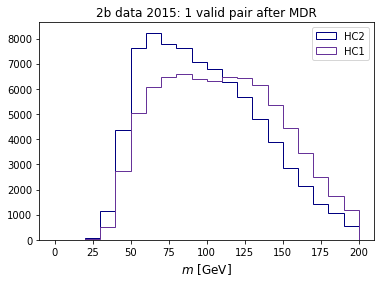

In [21]:
# Get an intution for what kind of bins we might need for this study 
plt.hist([df_2b.loc[mask_pi,'HC1_m'], df_2b.loc[mask_pi,'HC2_m']],20,range=(0,200),
         label=['HC1','HC2'],color=['rebeccapurple','navy'],histtype='step')
plt.xlabel('$m$ [GeV]',fontsize=12)
plt.legend()
plt.title(my_title)
plt.savefig('{}/MDR_HC_ms_{}validPair.pdf'.format(figDir,nPairs),bbox_inches='tight')
plt.show()

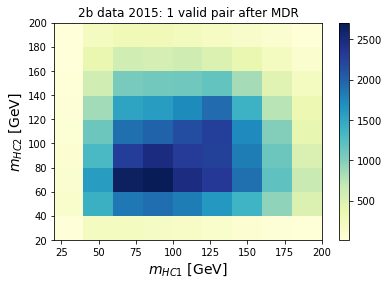

In [22]:
n, m1_edg, m2_edg, _ =  plt.hist2d(df_2b.loc[mask_pi,'HC1_m'], df_2b.loc[mask_pi,'HC2_m'],
                                   bins=9, range=[(20,200),(20,200)], cmap="YlGnBu")

plt.colorbar()
plt.title(my_title)
xlabel = '$m_{HC1}$ [GeV]'
ylabel = '$m_{HC2}$ [GeV]'
plt.xlabel(xlabel,fontsize=14)
plt.ylabel(ylabel,fontsize=14)
plt.savefig('{}/MDR_massplane_{}validPair_largerBins.pdf'.format(figDir,nPairs),bbox_inches='tight')
plt.show()

I'm also going to want to make a table of the summary statistics, so I think the easiest way to do this is with a `pd.DataFrame`.

In [23]:
index = ["{} < {} < {}".format(mmin,'$m_{HC1}$',mmax) for mmin,mmax in zip(m1_edg[:-1],m1_edg[1:])]
cols = ['mean','std dev','skew']

p_m2 = pd.DataFrame(0,index=index,columns=cols)

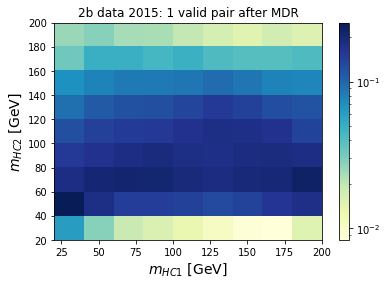

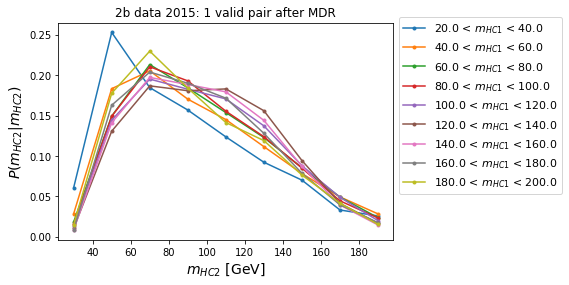

In [24]:
c = normHist2d(n,m1_edg,m2_edg,normCol=True,xlabel=xlabel,ylabel=ylabel,title=my_title,
               cmap='YlGnBu',returnCounts=True,figDir=figDir,figName='MDR_massplane_1validPair')

xs = 0.5 * (m2_edg[:-1] + m2_edg[1:])

for i, label  in enumerate(index):
    plt.plot(xs,c[i], marker='.', label=label)
    
plt.xlabel(ylabel,fontsize=14)
plt.ylabel(r'$P(m_{HC2} | m_{HC2})$',fontsize=14)
plt.title(my_title)
plt.legend(bbox_to_anchor=(1,1.05),fontsize=11)
plt.savefig('{}/MDR_mHC2_given_mHC1_{}validPair_largerBins.pdf'.format(figDir,nPairs),bbox_inches='tight')
plt.show()

It seems like as $m_{HC1}$ increases, the peak of the $P(m_{HC1} | m_{HC2})$ distributions increases up to a point, until the last two $m_{HC1}$ bins, and then it starts to decrease again.

**Is there a way I could quantify this using some summary statistics?**
- mean
- standard deviation
- skew

In [25]:
for mmin,mmax, label in zip(m1_edg[:-1],m1_edg[1:], index):
    
    mask = (df_2b.HC1_m > mmin) & (df_2b.HC1_m < mmax)
    m2_slice = df_2b.loc[mask_pi & mask,'HC2_m']
    
    p_m2.loc[label,'mean'] = np.mean(m2_slice)
    p_m2.loc[label,'std dev'] = np.std(m2_slice)
    p_m2.loc[label,'skew'] = skew(m2_slice)
    
p_m2.round(2)

mean  std dev  skew
20.0 < $m_{HC1}$ < 40.0     88.38    40.77  0.74
40.0 < $m_{HC1}$ < 60.0     96.44    39.87  0.60
60.0 < $m_{HC1}$ < 80.0     98.91    38.77  0.59
80.0 < $m_{HC1}$ < 100.0    98.82    38.30  0.60
100.0 < $m_{HC1}$ < 120.0  100.48    37.89  0.50
120.0 < $m_{HC1}$ < 140.0  101.69    36.60  0.43
140.0 < $m_{HC1}$ < 160.0   99.91    36.33  0.52
160.0 < $m_{HC1}$ < 180.0   97.83    36.90  0.64
180.0 < $m_{HC1}$ < 200.0   95.87    38.59  0.79

What does this tell us? I think $m_{HC1}$ and $m_{HC2}$ are correlated, so we should account for this correlation in the form of the funtional fit, and *not* treat the two variables as uncorrelated.


**I still need to do the same thing for $P(m_{HC1} | m_{HC2})$.**

In [26]:
index = ["{} < {} < {}".format(mmin,'$m_{HC2}$',mmax) for mmin,mmax in zip(m2_edg[:-1],m2_edg[1:])]
p_m1 = pd.DataFrame(0,index=index,columns=cols)

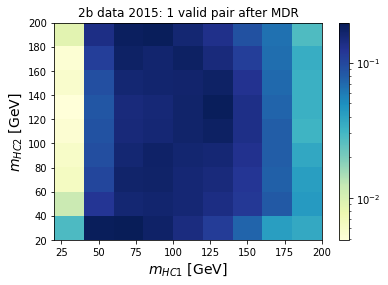

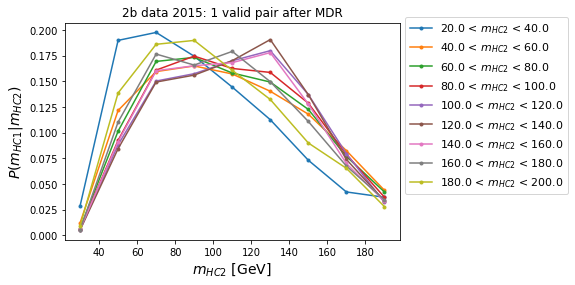

In [27]:
c = normHist2d(n,m1_edg,m2_edg,normCol=False,xlabel=xlabel,ylabel=ylabel,title=my_title,
               cmap='YlGnBu',returnCounts=True,figDir=figDir,figName='MDR_massplane_1validPair')


xs = 0.5 * (m1_edg[:-1] + m1_edg[1:])

for i, label  in enumerate(index):
    plt.plot(xs,c[:,i], marker='.', label=label)
    
plt.xlabel(ylabel,fontsize=14)
plt.ylabel(r'$P(m_{HC1} | m_{HC2})$',fontsize=14)
plt.title(my_title)
plt.legend(bbox_to_anchor=(1,1.05),fontsize=11)
plt.savefig('{}/MDR_mHC1_given_mHC2_{}validPair_largerBins.pdf'.format(figDir,nPairs),bbox_inches='tight')
plt.show()

In [28]:
for mmin,mmax, label in zip(m2_edg[:-1],m2_edg[1:], index):
    
    mask = (df_2b.HC2_m > mmin) & (df_2b.HC2_m < mmax)
    m1_slice = df_2b.loc[mask_pi & mask,'HC1_m']
    
    p_m1.loc[label,'mean'] = np.mean(m1_slice)
    p_m1.loc[label,'std dev'] = np.std(m1_slice)
    p_m1.loc[label,'skew'] = skew(m2_slice)
    
p_m1.round(2)

mean  std dev  skew
20.0 < $m_{HC2}$ < 40.0     99.66    45.58  0.79
40.0 < $m_{HC2}$ < 60.0    111.49    44.41  0.79
60.0 < $m_{HC2}$ < 80.0    112.04    42.81  0.79
80.0 < $m_{HC2}$ < 100.0   113.57    42.80  0.79
100.0 < $m_{HC2}$ < 120.0  114.79    41.66  0.79
120.0 < $m_{HC2}$ < 140.0  114.49    40.50  0.79
140.0 < $m_{HC2}$ < 160.0  112.50    40.84  0.79
160.0 < $m_{HC2}$ < 180.0  109.73    42.35  0.79
180.0 < $m_{HC2}$ < 200.0  105.20    43.29  0.79

Ok, I think these were some of the first studies that Michael wanted me to look at for the one valid pairing category... let's move on now!

### Two valid pairings

So as soon as we get to this point, the situation becomes a bit more complicated because we can quantify the modelling either 
1. After the MDR
2. After the $D_{hh}$ minimization

**Plan:** I'll do *both* to build up my intuition, and also because the distribution before the $D_{hh}$ minimization looks a bit easier to model.

/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3_tf/lib/python3.6/site-packages/matplotlib/axes/_base.py:1330: MatplotlibDeprecationWarning: 
box-forced
  "2.2", "box-forced", obj_type="keyword argument")


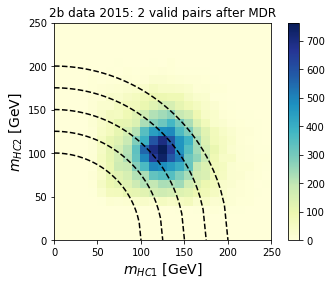

In [29]:
nPairs = 2

# Get the masses
my_title = "2b " + title + ': 2 valid pairs after MDR'
mask_pi = (df_2b.nValidPairs == nPairs)

m1_cols = ['pair{}_HC1_m'.format(i) for i in range(3)]
m2_cols = ['pair{}_HC2_m'.format(i) for i in range(3)]
pair_cols = ['pair{}_mask'.format(i) for i in range(3)]

m1_npi = df_2b.loc[mask_pi,m1_cols].values
m2_npi = df_2b.loc[mask_pi,m2_cols].values
pair_mask = df_2b.loc[mask_pi,pair_cols].values

plt.figure()
ax = plt.subplot(aspect='equal',adjustable='box-forced')

plt.hist2d(m1_npi[pair_mask], m2_npi[pair_mask],
          bins=25, range=[r,r], cmap="YlGnBu")#,norm=LogNorm())

plt.colorbar()
plt.title(my_title)
plt.xlabel('$m_{HC1}$ [GeV]',fontsize=14)
plt.ylabel('$m_{HC2}$ [GeV]',fontsize=14)

# Add some semi-circles on this line too to demonstrate the effect we're trying to probe
for radius in [100, 125, 150, 175, 200]:
    
    m1s = np.linspace(0,radius)
    m2s = np.sqrt(radius**2 - m1s**2)

    plt.plot(m1s,m2s,'k--')

plt.savefig('{}/MDR_massplane_{}validPair.pdf'.format(figDir,nPairs))
plt.show()

In [30]:
theta = np.arctan( m2_npi[pair_mask] / m1_npi[pair_mask] )
R = np.sqrt(m1_npi[pair_mask]**2 + m2_npi[pair_mask]**2)

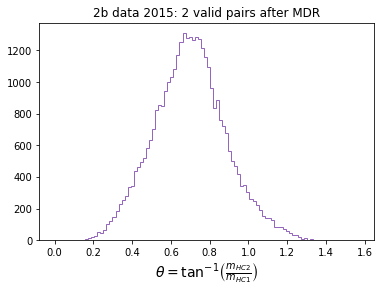

In [31]:
plt.hist(theta,bins=100,range=(0,np.pi/2),histtype='step',color="C4")

xlabel = r'$\theta = \tan^{-1}  \left( \frac{m_{HC2}}{m_{HC1}} \right) $'
plt.xlabel(xlabel,fontsize=14)
plt.title(my_title)

plt.savefig('{}/MDR_theta_{}validPair.pdf'.format(figDir,nPairs))
plt.show()

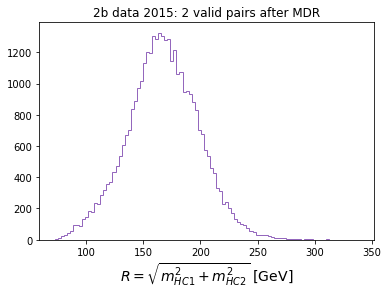

In [32]:
plt.hist(R,100,histtype='step',color="C4")
ylabel = '$R = \sqrt{m_{HC1}^2 + m_{HC2}^2}$ [GeV]'
plt.xlabel(ylabel,fontsize=14)
plt.title(my_title)

plt.savefig('{}/MDR_R_{}validPair.pdf'.format(figDir,nPairs))
plt.show()

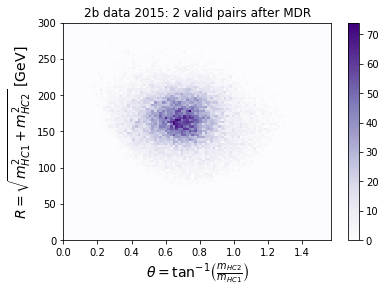

In [33]:
plt.hist2d(theta, R, bins=100, range=[(0,np.pi/2),(0,300)], cmap="Purples")

plt.xlabel(xlabel,fontsize=14)
plt.ylabel(ylabel,fontsize=14)
plt.title(my_title)
plt.colorbar()

plt.savefig('{}/MDR_R_vs_theta_{}validPair.pdf'.format(figDir,nPairs))
plt.show()

In [34]:
corrCoeff, p = pearsonr(theta,R)
print(corrCoeff,p)

-0.12024685765837771 2.947953267715873e-116


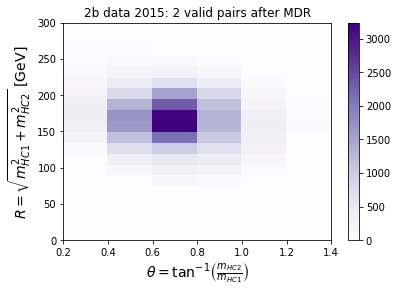

In [35]:
n, xedg, yedg, _ = plt.hist2d(theta, R, bins=[6,20], range=[(0.2,1.4),(0,300)], cmap="Purples")

plt.xlabel(xlabel,fontsize=14)
plt.ylabel(ylabel,fontsize=14)
plt.title(my_title)
plt.colorbar()

plt.savefig('{}/MDR_R_vs_theta_{}validPair_largerBins.pdf'.format(figDir,nPairs))
plt.show()

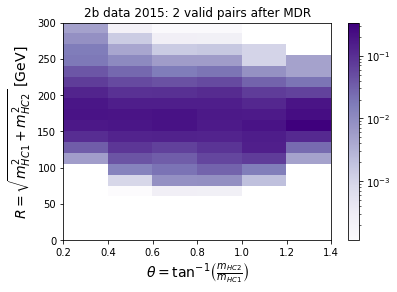

In [36]:
c = normHist2d(n,xedg,yedg,normCol=True,xlabel=xlabel,ylabel=ylabel,title=my_title,
               cmap='Purples',returnCounts=True,figDir=figDir,figName='MDR_R_vs_theta_2validPair')

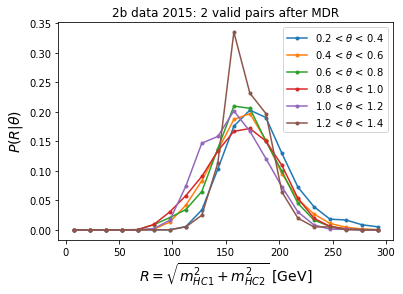

In [38]:
Rs = 0.5 * (yedg[:-1] + yedg[1:])

for i, thetaBin  in enumerate(zip(xedg[:-1],xedg[1:])):
    label = r"{} < $\theta$ < {}".format(*thetaBin)
    plt.plot(Rs,c[i], marker='.', label=label)
    
plt.xlabel(ylabel,fontsize=14)
plt.ylabel(r'$P(R | \theta)$',fontsize=14)
plt.title(my_title)
plt.legend()

plt.savefig('{}/MDR_R_given_theta_{}validPair.pdf'.format(figDir,nPairs),bbox_inches='tight')
plt.show()

Ok, I think that it's good that I made this plot for comparison w/ the one valid pairings plot, but it might also be instructive to look at only the $\theta$ bins where I have a significant number of entries.

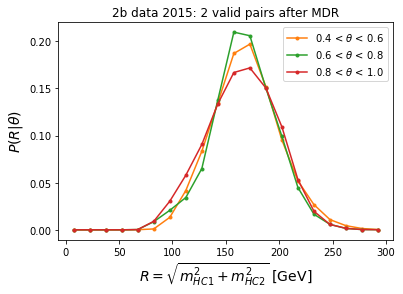

In [39]:
for i in [1,2,3]: # , thetaMin, thetaMax, color  in enumerate(zip(xedg[1:-3],xedg[2:-2])):
    label = r"{} < $\theta$ < {}".format(xedg[i],xedg[i+1])
    plt.plot(Rs,c[i], marker='.', label=label,color="C{}".format(i))
    
plt.xlabel(ylabel,fontsize=14)
plt.ylabel(r'$P(R | \theta)$',fontsize=14)
plt.title(my_title)
plt.legend()

plt.savefig('{}/MDR_R_given_theta_{}validPair_zoomTheta.pdf'.format(figDir,nPairs),bbox_inches='tight')
plt.show()

### Mass dependence

**Next:** Let's repeat the mass correlation studies. Since this shape looks very much like a circle, I think that this might mean that $m_{HC1}$ and $m_{HC2}$ can be modeled independently, but we'll see!

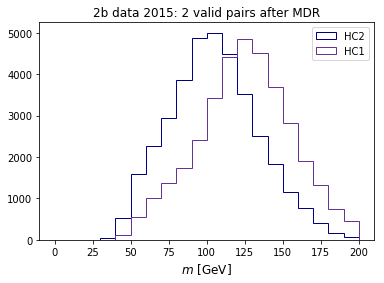

In [41]:
# Get an intution for what kind of bins we might need for this study 
plt.hist([m1_npi[pair_mask], m2_npi[pair_mask]],20,range=(0,200),
         label=['HC1','HC2'],color=['rebeccapurple','navy'],histtype='step')
plt.xlabel('$m$ [GeV]',fontsize=12)
plt.legend()
plt.title(my_title)
plt.savefig('{}/MDR_HC_ms_{}validPair.pdf'.format(figDir,nPairs),bbox_inches='tight')
plt.show()

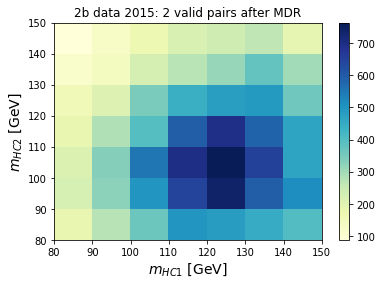

In [53]:
n, m1_edg, m2_edg, _ = plt.hist2d(m1_npi[pair_mask], m2_npi[pair_mask],
                                  bins=7, range=[(80,150),(80,150)], cmap="YlGnBu")

plt.colorbar()
plt.title(my_title)
xlabel = '$m_{HC1}$ [GeV]'
ylabel = '$m_{HC2}$ [GeV]'
plt.xlabel(xlabel,fontsize=14)
plt.ylabel(ylabel,fontsize=14)
plt.savefig('{}/MDR_massplane_{}validPair_largerBins.pdf'.format(figDir,nPairs),bbox_inches='tight')
plt.show()

In [57]:
index = ["{:.0f} < {} < {:.0f}".format(mmin,'$m_{HC1}$',mmax) for mmin,mmax in zip(m1_edg[:-1],m1_edg[1:])]
cols = ['mean','std dev','skew']

p_m2 = pd.DataFrame(0,index=index,columns=cols)

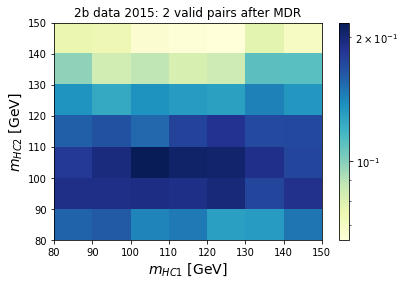

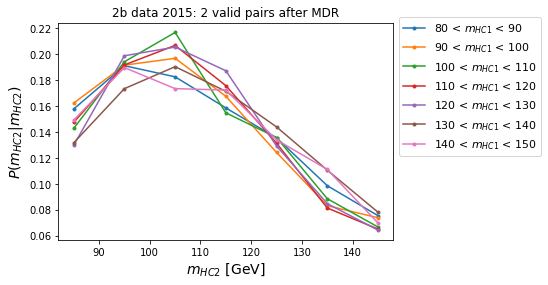

In [58]:
c = normHist2d(n,m1_edg,m2_edg,normCol=True,xlabel=xlabel,ylabel=ylabel,title=my_title,
               cmap='YlGnBu',returnCounts=True,figDir=figDir,figName='MDR_massplane_1validPair')

xs = 0.5 * (m2_edg[:-1] + m2_edg[1:])

for i, label  in enumerate(index):
    plt.plot(xs,c[i], marker='.', label=label)
    
plt.xlabel(ylabel,fontsize=14)
plt.ylabel(r'$P(m_{HC2} | m_{HC2})$',fontsize=14)
plt.title(my_title)
plt.legend(bbox_to_anchor=(1,1.05),fontsize=11)
plt.savefig('{}/MDR_mHC2_given_mHC1_{}validPair_largerBins.pdf'.format(figDir,nPairs),bbox_inches='tight')
plt.show()

I could maybe thin about adding error bars to thius plot as well, but I think this supports our hypothesis that $m_{HC1}$ and $m_{HC2}$ are uncorrelated.

In [59]:
for mmin,mmax, label in zip(m1_edg[:-1],m1_edg[1:], index):
    
    mask = (m1_npi[pair_mask] > mmin) & (m1_npi[pair_mask] < mmax)
    m2_slice = m2_npi[pair_mask][mask]
    
    p_m2.loc[label,'mean'] = np.mean(m2_slice)
    p_m2.loc[label,'std dev'] = np.std(m2_slice)
    p_m2.loc[label,'skew'] = skew(m2_slice)
    
p_m2.round(2)

mean  std dev  skew
80 < $m_{HC1}$ < 90    104.77    31.60  0.41
90 < $m_{HC1}$ < 100   103.91    29.38  0.37
100 < $m_{HC1}$ < 110  105.54    28.14  0.29
110 < $m_{HC1}$ < 120  106.73    27.74  0.37
120 < $m_{HC1}$ < 130  106.37    27.52  0.29
130 < $m_{HC1}$ < 140  107.53    28.25  0.22
140 < $m_{HC1}$ < 150  105.72    29.04  0.24

**Conclusion:** The means are all peaking in roughly the same spot, and the std devs are all roughly the same size, and about an order of magnitude larger than the change between the means.

In [60]:
index = ["{:.0f} < {} < {:.0f}".format(mmin,'$m_{HC2}$',mmax) for mmin,mmax in zip(m2_edg[:-1],m2_edg[1:])]
p_m1 = pd.DataFrame(0,index=index,columns=cols)

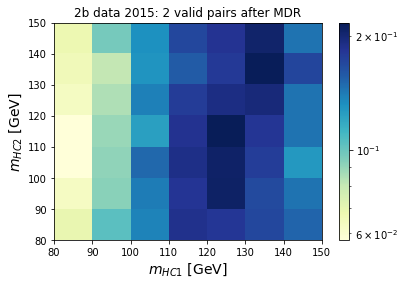

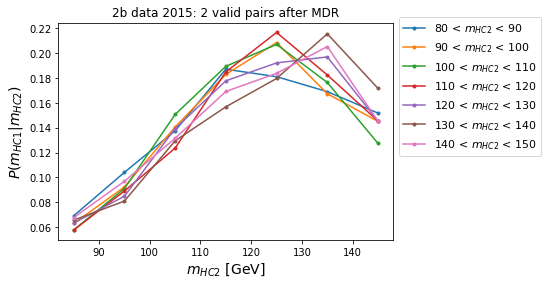

In [61]:
c = normHist2d(n,m1_edg,m2_edg,normCol=False,xlabel=xlabel,ylabel=ylabel,title=my_title,
               cmap='YlGnBu',returnCounts=True,figDir=figDir,figName='MDR_massplane_1validPair')

xs = 0.5 * (m1_edg[:-1] + m1_edg[1:])

for i, label  in enumerate(index):
    plt.plot(xs,c[:,i], marker='.', label=label)
    
plt.xlabel(ylabel,fontsize=14)
plt.ylabel(r'$P(m_{HC1} | m_{HC2})$',fontsize=14)
plt.title(my_title)
plt.legend(bbox_to_anchor=(1,1.05),fontsize=11)
plt.savefig('{}/MDR_mHC1_given_mHC2_{}validPair_largerBins.pdf'.format(figDir,nPairs),bbox_inches='tight')
plt.show()

In [62]:
for mmin,mmax, label in zip(m2_edg[:-1],m2_edg[1:], index):
    
    mask = (m2_npi[pair_mask] > mmin) & (m2_npi[pair_mask] < mmax)
    m1_slice = m1_npi[pair_mask][mask]
    
    p_m1.loc[label,'mean'] = np.mean(m1_slice)
    p_m1.loc[label,'std dev'] = np.std(m1_slice)
    p_m1.loc[label,'skew'] = skew(m1_slice)
    
p_m1.round(2)

mean  std dev  skew
80 < $m_{HC2}$ < 90    126.56    33.17  0.34
90 < $m_{HC2}$ < 100   126.51    31.87  0.39
100 < $m_{HC2}$ < 110  125.95    30.56  0.35
110 < $m_{HC2}$ < 120  126.96    30.49  0.10
120 < $m_{HC2}$ < 130  127.80    31.16  0.16
130 < $m_{HC2}$ < 140  126.05    31.32 -0.03
140 < $m_{HC2}$ < 150  123.99    31.54 -0.04

**Fitting:** Can we fit a 2d Gaussian to this shape?

In [95]:
mean_m1 = np.mean(m1_npi[pair_mask]) 
mean_m2 = np.mean(m2_npi[pair_mask])

mu = np.array([mean_m1,mean_m2])

cov = np.cov(m1_npi[pair_mask],m2_npi[pair_mask])

In [99]:
cov

array([[1078.71446771,  -48.55439517],
       [ -48.55439517,  854.7498113 ]])

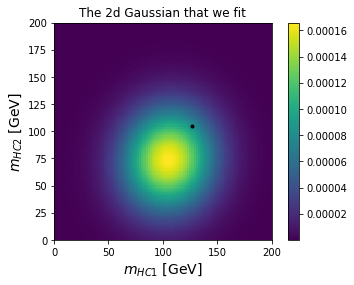

In [100]:
# Sanity check: plot the result of this fit

x = np.linspace(0,200,100)
y = np.linspace(0,200,100)

pdf = lambda v : np.exp(- 0.5 * np.dot((v-mu).T , np.dot(np.linalg.inv(cov),v-mu))) / (2*np.pi * np.sqrt(np.linalg.det(cov)))

z = np.array([[pdf(np.array([xi,yi])) for yi in y] for xi in x])

plt.imshow(z,extent=[0,200,0,200])

plt.xlabel(xlabel,fontsize=14)
plt.ylabel(ylabel,fontsize=14)
plt.title('The 2d Gaussian that we fit')
plt.colorbar()

plt.plot([mean_m1],[mean_m2],'k.')

plt.show()

Ok, I was having some difficulties plotting the pdf for the 2d Gaussian that I was trying to fit. But I can come back to this next week.

#### Goodness of fit tests

**Idea:** I want to see how well these functions that I was using actually capture the data that I'm interested in looking at.

I know about the $\chi^2$ test statistic, I think Matthew was also looking at the Wilk's and Wild's tests?


### Two valid pairings: After $D_{hh}$ minimiziation

### Mass dependence

**Next:** Let's repeat the mass correlation studies. Since this shape looks very much like a circle, I think that this might mean that $m_{HC1}$ and $m_{HC2}$ can be modeled independently, but we'll see!

In [102]:
my_title = '2b data 2015: 2 valid pairs after $D_{hh}$ minimization'

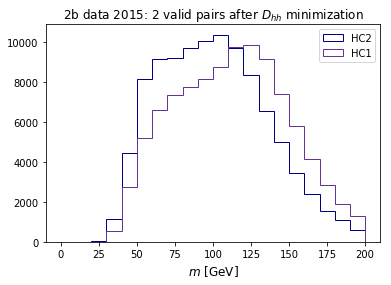

In [104]:
# Get an intution for what kind of bins we might need for this study 

plt.hist([df_2b.loc[df_2b.MDR,'HC1_m'], df_2b.loc[df_2b.MDR,'HC2_m']],20,range=(0,200),
         label=['HC1','HC2'],color=['rebeccapurple','navy'],histtype='step')
plt.xlabel('$m$ [GeV]',fontsize=12)
plt.legend()
plt.title(my_title)
plt.savefig('{}/dhh_HC_ms_{}validPair.pdf'.format(figDir,nPairs),bbox_inches='tight')
plt.show()

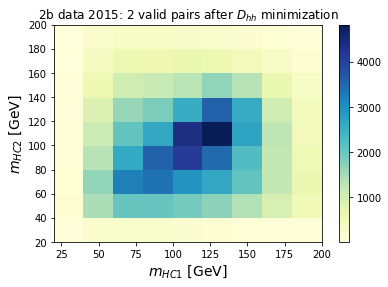

In [106]:
n, m1_edg, m2_edg, _ =  plt.hist2d(df_2b.loc[df_2b.MDR,'HC1_m'], df_2b.loc[df_2b.MDR,'HC2_m'],
                                   bins=9, range=[(20,200),(20,200)], cmap="YlGnBu")

plt.colorbar()
plt.title(my_title)
xlabel = '$m_{HC1}$ [GeV]'
ylabel = '$m_{HC2}$ [GeV]'
plt.xlabel(xlabel,fontsize=14)
plt.ylabel(ylabel,fontsize=14)
plt.savefig('{}/dhh_massplane_{}validPair_largerBins.pdf'.format(figDir,nPairs),bbox_inches='tight')
plt.show()

I'm also going to want to make a table of the summary statistics, so I think the easiest way to do this is with a `pd.DataFrame`.

In [107]:
index = ["{} < {} < {}".format(mmin,'$m_{HC1}$',mmax) for mmin,mmax in zip(m1_edg[:-1],m1_edg[1:])]
cols = ['mean','std dev','skew']

p_m2 = pd.DataFrame(0,index=index,columns=cols)

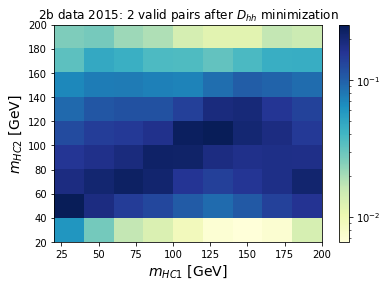

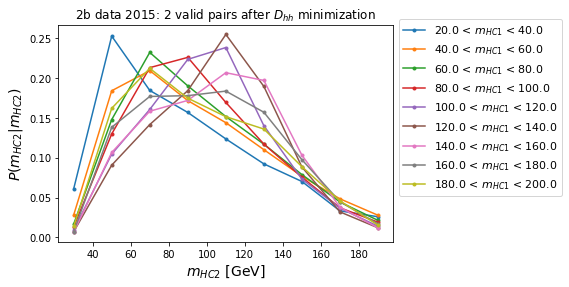

In [108]:
c = normHist2d(n,m1_edg,m2_edg,normCol=True,xlabel=xlabel,ylabel=ylabel,title=my_title,
               cmap='YlGnBu',returnCounts=True,figDir=figDir,figName='dhh_massplane_1validPair')

xs = 0.5 * (m2_edg[:-1] + m2_edg[1:])

for i, label  in enumerate(index):
    plt.plot(xs,c[i], marker='.', label=label)
    
plt.xlabel(ylabel,fontsize=14)
plt.ylabel(r'$P(m_{HC2} | m_{HC2})$',fontsize=14)
plt.title(my_title)
plt.legend(bbox_to_anchor=(1,1.05),fontsize=11)
plt.savefig('{}/dhh_mHC2_given_mHC1_{}validPair_largerBins.pdf'.format(figDir,nPairs),bbox_inches='tight')
plt.show()

It seems like as $m_{HC1}$ increases, the peak of the $P(m_{HC1} | m_{HC2})$ distributions increases up to a point, until the last two $m_{HC1}$ bins, and then it starts to decrease again.

**Is there a way I could quantify this using some summary statistics?**
- mean
- standard deviation
- skew

In [109]:
for mmin,mmax, label in zip(m1_edg[:-1],m1_edg[1:], index):
    
    mask = (df_2b.HC1_m > mmin) & (df_2b.HC1_m < mmax)
    m2_slice = df_2b.loc[mask_pi & mask,'HC2_m']
    
    p_m2.loc[label,'mean'] = np.mean(m2_slice)
    p_m2.loc[label,'std dev'] = np.std(m2_slice)
    p_m2.loc[label,'skew'] = skew(m2_slice)
    
p_m2.round(2)

mean  std dev  skew
20.0 < $m_{HC1}$ < 40.0       NaN      NaN   NaN
40.0 < $m_{HC1}$ < 60.0     80.59    23.10  1.06
60.0 < $m_{HC1}$ < 80.0     86.26    24.54  0.69
80.0 < $m_{HC1}$ < 100.0    95.67    23.20  0.42
100.0 < $m_{HC1}$ < 120.0  104.56    21.14  0.31
120.0 < $m_{HC1}$ < 140.0  112.15    22.09  0.02
140.0 < $m_{HC1}$ < 160.0  119.72    24.19 -0.24
160.0 < $m_{HC1}$ < 180.0  125.33    25.99 -0.12
180.0 < $m_{HC1}$ < 200.0  127.54    24.55 -0.06

What does this tell us? I think $m_{HC1}$ and $m_{HC2}$ are correlated, so we should account for this correlation in the form of the funtional fit, and *not* treat the two variables as uncorrelated.


**I still need to do the same thing for $P(m_{HC1} | m_{HC2})$.**

In [110]:
index = ["{} < {} < {}".format(mmin,'$m_{HC2}$',mmax) for mmin,mmax in zip(m2_edg[:-1],m2_edg[1:])]
p_m1 = pd.DataFrame(0,index=index,columns=cols)

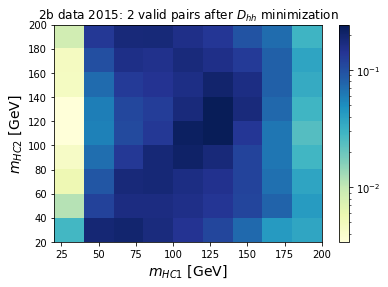

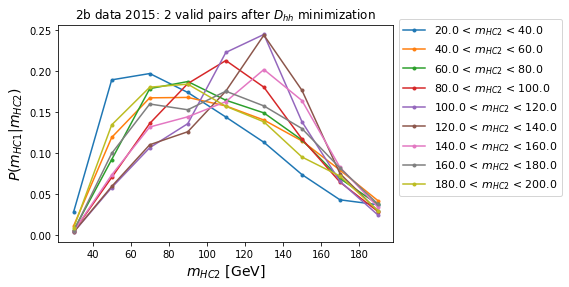

In [111]:
c = normHist2d(n,m1_edg,m2_edg,normCol=False,xlabel=xlabel,ylabel=ylabel,title=my_title,
               cmap='YlGnBu',returnCounts=True,figDir=figDir,figName='dhh_massplane_1validPair')


xs = 0.5 * (m1_edg[:-1] + m1_edg[1:])

for i, label  in enumerate(index):
    plt.plot(xs,c[:,i], marker='.', label=label)
    
plt.xlabel(ylabel,fontsize=14)
plt.ylabel(r'$P(m_{HC1} | m_{HC2})$',fontsize=14)
plt.title(my_title)
plt.legend(bbox_to_anchor=(1,1.05),fontsize=11)
plt.savefig('{}/dhh_mHC1_given_mHC2_{}validPair_largerBins.pdf'.format(figDir,nPairs),bbox_inches='tight')
plt.show()

In [112]:
for mmin,mmax, label in zip(m2_edg[:-1],m2_edg[1:], index):
    
    mask = (df_2b.HC2_m > mmin) & (df_2b.HC2_m < mmax)
    m1_slice = df_2b.loc[mask_pi & mask,'HC1_m']
    
    p_m1.loc[label,'mean'] = np.mean(m1_slice)
    p_m1.loc[label,'std dev'] = np.std(m1_slice)
    p_m1.loc[label,'skew'] = skew(m2_slice)
    
p_m1.round(2)

mean  std dev  skew
20.0 < $m_{HC2}$ < 40.0    144.48    13.11 -0.06
40.0 < $m_{HC2}$ < 60.0     97.84    28.73 -0.06
60.0 < $m_{HC2}$ < 80.0    103.61    27.84 -0.06
80.0 < $m_{HC2}$ < 100.0   114.46    23.63 -0.06
100.0 < $m_{HC2}$ < 120.0  123.39    22.80 -0.06
120.0 < $m_{HC2}$ < 140.0  132.69    24.26 -0.06
140.0 < $m_{HC2}$ < 160.0  137.94    25.91 -0.06
160.0 < $m_{HC2}$ < 180.0  145.32    26.74 -0.06
180.0 < $m_{HC2}$ < 200.0  154.54    24.78 -0.06